# Importing Libraries

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#Reading csv file 
sales=pd.read_csv('sales.csv')
sales.head(10)

,Invoice ID,Branch,City,Member,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Yes,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,No,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,No,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Yes,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,No,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,No,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Yes,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,No,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Yes,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Yes,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [4]:
sales['Product line']

0           Health and beauty
1      Electronic accessories
2          Home and lifestyle
3           Health and beauty
4           Sports and travel
                ...          
995         Health and beauty
996        Home and lifestyle
997        Food and beverages
998        Home and lifestyle
999       Fashion accessories
Name: Product line, Length: 1000, dtype: object

# 1.Which city has more female shopping?

In [5]:
sales.groupby(['Gender','City']).count()

Invoice ID  Branch  Member  Product line  Unit price  \
Gender City                                                              
Female Mandalay          162     162     162           162         162   
       Naypyitaw         178     178     178           178         178   
       Yangon            161     161     161           161         161   
Male   Mandalay          170     170     170           170         170   
       Naypyitaw         150     150     150           150         150   
       Yangon            179     179     179           179         179   

                  Quantity  Tax 5%  Total  Date  Time  Payment  cogs  \
Gender City                                                            
Female Mandalay        162     162    162   162   162      162   162   
       Naypyitaw       178     178    178   178   178      178   178   
       Yangon          161     161    161   161   161      161   161   
Male   Mandalay        170     170    170   170   170      170   170   
       Naypyitaw       150     150    150   150   150      150   150   
       Yangon          179     179    179   179   179      179   179   

                  gross margin percentage  gross income  Rating  
Gender City                                                      
Female Mandalay                       162           162     162  
       Naypyitaw                      178           178     178  
       Yangon                         161           161     161  
Male   Mandalay                       170           170     170  
       Naypyitaw                      150           150     150  
       Yangon                         179           179     179

In [6]:
female_shoppers=sales.groupby(['Gender','City']).count()['Member']
print(female_shoppers)

Gender  City     
Female  Mandalay     162
        Naypyitaw    178
        Yangon       161
Male    Mandalay     170
        Naypyitaw    150
        Yangon       179
Name: Member, dtype: int64


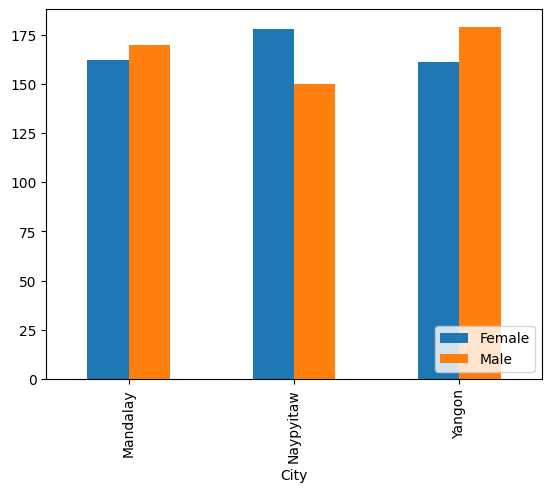

In [10]:
#plotting bar graph 
female_shoppers.unstack(level=0).plot(kind='bar')
plt.legend(loc='lower right')

# 2.Who spends more money?

In [12]:
sales.groupby('Gender').sum()['Total']

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

<Axes: xlabel='Gender'>

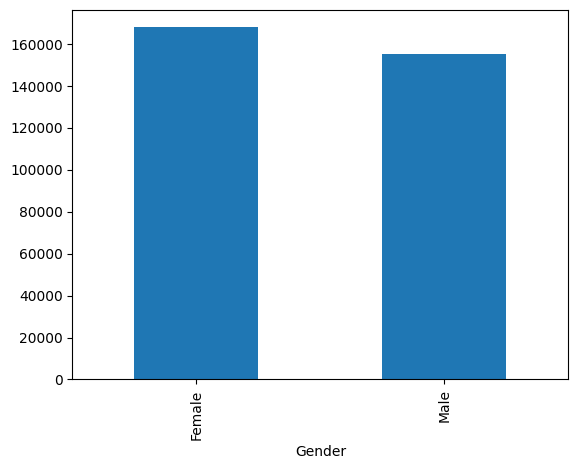

In [13]:
spend=sales.groupby('Gender').sum()['Total']
spend.plot(kind='bar')

# 3.Which type of customer spends more? Member or non member?

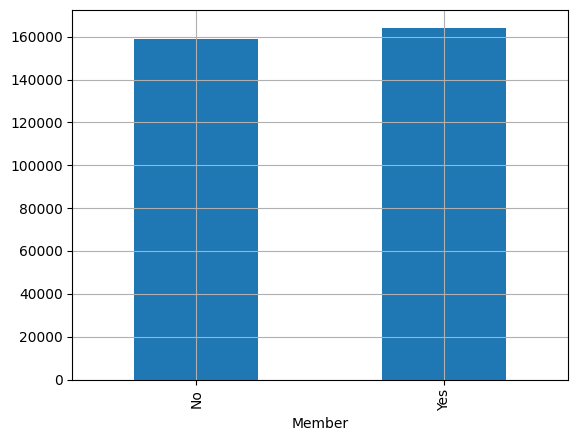

In [17]:
sales.groupby('Member').sum()['Total']
member=sales.groupby('Member').sum()['Total']
member.plot(kind='bar')

# 4.Which Product Line sells more?

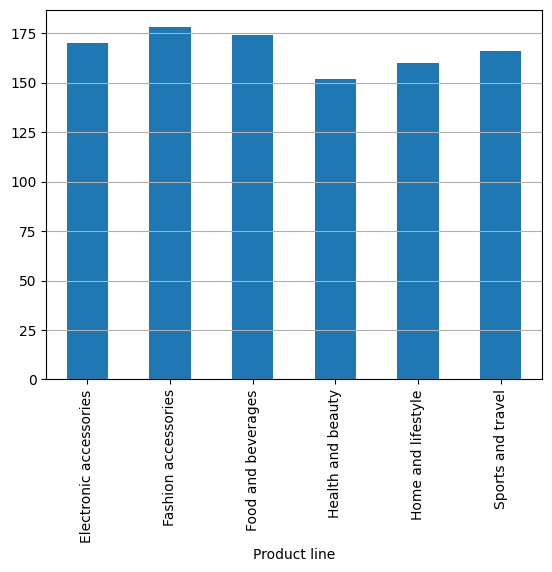

In [18]:
category=sales.groupby('Product line').count()['Invoice ID']
category.plot(kind='bar')
plt.grid(axis='y')

# 5.Which Product Line is Popular among Men vs Women?

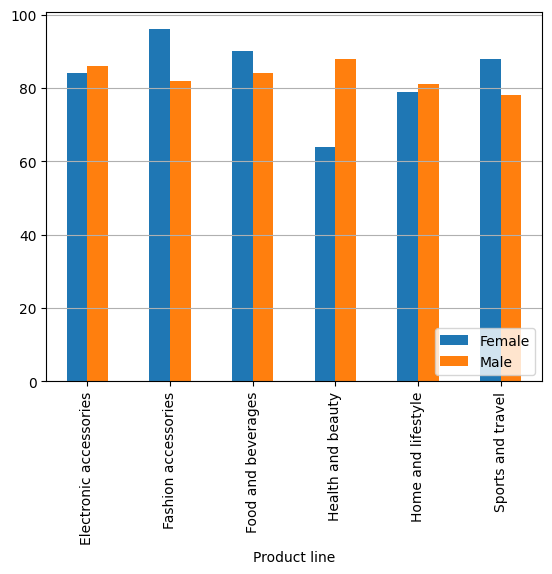

In [20]:
sales.groupby(['Gender','Product line']).count()['Invoice ID']
sales_gender= sales.groupby(['Gender','Product line']).count()['Invoice ID']
sales_gender.unstack(level=0).plot(kind='bar')
plt.legend(loc='lower right')
plt.grid(axis='y')


# 6.What days of the month make most sales?

In [22]:
sales['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [24]:
pd.to_datetime(sales['Date'])

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [25]:
pd.to_datetime(sales['Date']).dt.day
pd.to_datetime(sales['Date']).dt.month
sales['Day']=pd.to_datetime(sales['Date']).dt.day
sales['Month']=pd.to_datetime(sales['Date']).dt.month
sales.head(10)

,Invoice ID,Branch,City,Member,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
0,750-67-8428,A,Yangon,Yes,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1
1,226-31-3081,C,Naypyitaw,No,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3
2,631-41-3108,A,Yangon,No,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Yes,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1
4,373-73-7910,A,Yangon,No,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2
5,699-14-3026,C,Naypyitaw,No,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,25,3
6,355-53-5943,A,Yangon,Yes,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,25,2
7,315-22-5665,C,Naypyitaw,No,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,24,2
8,665-32-9167,A,Yangon,Yes,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,10,1
9,692-92-5582,B,Mandalay,Yes,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9,20,2


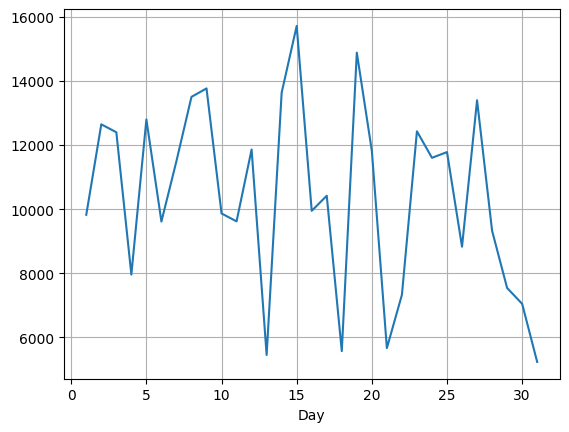

In [26]:
sales.groupby('Day').sum()['Total'].plot()
plt.grid()

# 7.What months make the most sales?

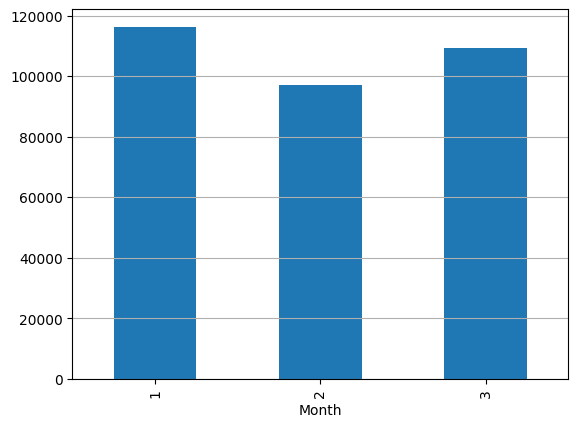

In [27]:
sales.groupby('Month').sum()['Total'].plot(kind='bar')
plt.grid(axis='y')

# 8.What Hours make the most sales?

In [28]:
sales['Time']
pd.to_datetime(sales['Time'])
sales['Hour']=pd.to_datetime(sales['Time']).dt.hour
sales.head(10)


C:\Users\Admin\AppData\Local\Temp\ipykernel_18900\2234883867.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(sales['Time'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_18900\2234883867.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Hour']=pd.to_datetime(sales['Time']).dt.hour


,Invoice ID,Branch,City,Member,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Hour
0,750-67-8428,A,Yangon,Yes,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,13
1,226-31-3081,C,Naypyitaw,No,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,10
2,631-41-3108,A,Yangon,No,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,13
3,123-19-1176,A,Yangon,Yes,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,20
4,373-73-7910,A,Yangon,No,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,10
5,699-14-3026,C,Naypyitaw,No,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,25,3,18
6,355-53-5943,A,Yangon,Yes,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,25,2,14
7,315-22-5665,C,Naypyitaw,No,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,24,2,11
8,665-32-9167,A,Yangon,Yes,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,10,1,17
9,692-92-5582,B,Mandalay,Yes,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9,20,2,13


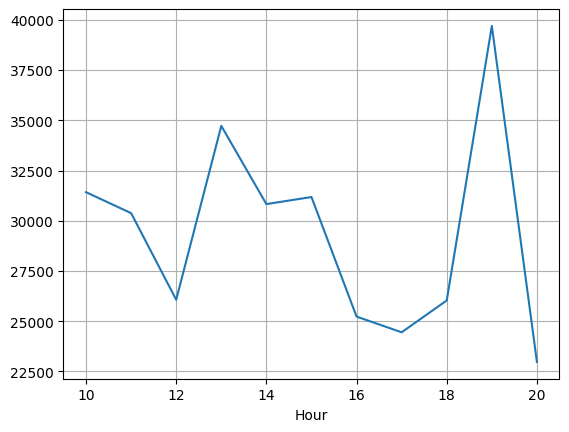

In [29]:
sales.groupby('Hour').sum()['Total'].plot()
plt.grid()

# 9.What Time Do People Make More E-payment vs what time people do cash payments?

In [30]:
sales.groupby(['Payment','Hour']).count()['Member']

Payment      Hour
Cash         10      39
             11      34
             12      29
             13      40
             14      27
             15      35
             16      23
             17      29
             18      30
             19      35
             20      23
Credit card  10      35
             11      25
             12      30
             13      27
             14      25
             15      30
             16      21
             17      27
             18      31
             19      36
             20      24
Ewallet      10      27
             11      31
             12      30
             13      36
             14      31
             15      37
             16      33
             17      18
             18      32
             19      42
             20      28
Name: Member, dtype: int64

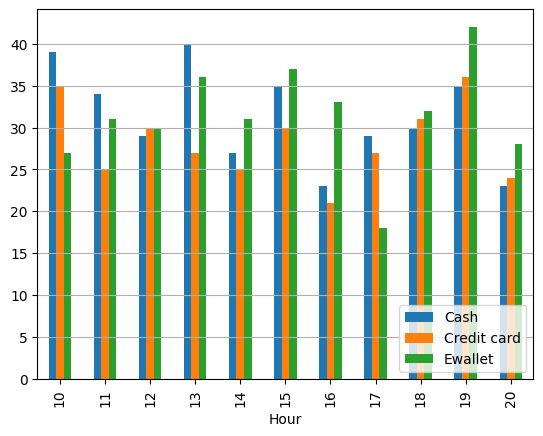

In [31]:
sales.groupby(['Payment','Hour']).count()['Member'].unstack(level=0).plot(kind='bar')
plt.grid(axis='y')
plt.legend(loc='lower right')